,Dataset,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC,F2 Score
0,Train,Optimized Decision Tree,0.759551,0.766739,0.746321,0.756392,0.833872,NaN
1,Test,Optimized Decision Tree,0.751431,0.752053,0.749591,0.750820,0.817060,NaN
2,Train,Optimized Random Forest,0.872415,0.860339,0.889278,0.874569,0.943726,NaN
3,Test,Optimized Random Forest,0.743254,0.740681,0.747954,0.744300,0.820438,NaN
4,Train,Optimized XGBoost,0.780231,0.744200,0.854240,0.795432,0.870969,NaN
5,Test,Optimized XGBoost,0.730989,0.692098,0.831424,0.755390,0.830809,NaN
6,Train,Logistic Regression,0.717589,0.720682,0.710582,0.715596,NaN,0.712579
7,Test,Logistic Regression,0.750000,0.426455,0.659574,0.517995,NaN,0.594571
8,Train,SVM,0.801682,0.811280,0.786265,0.798577,NaN,0.791144
9,Test,SVM,0.792667,0.494241,0.772504,0.602810,NaN,0.694322


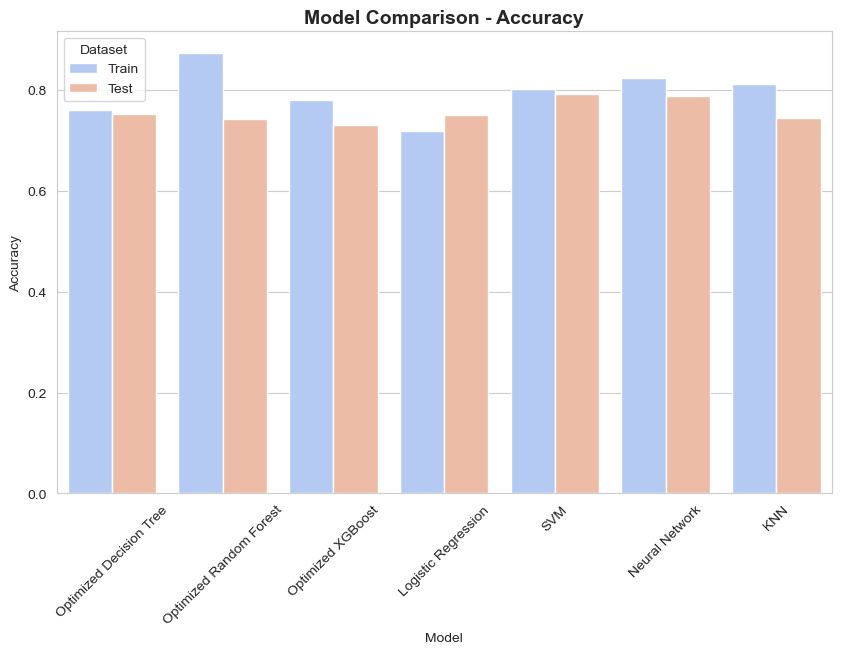

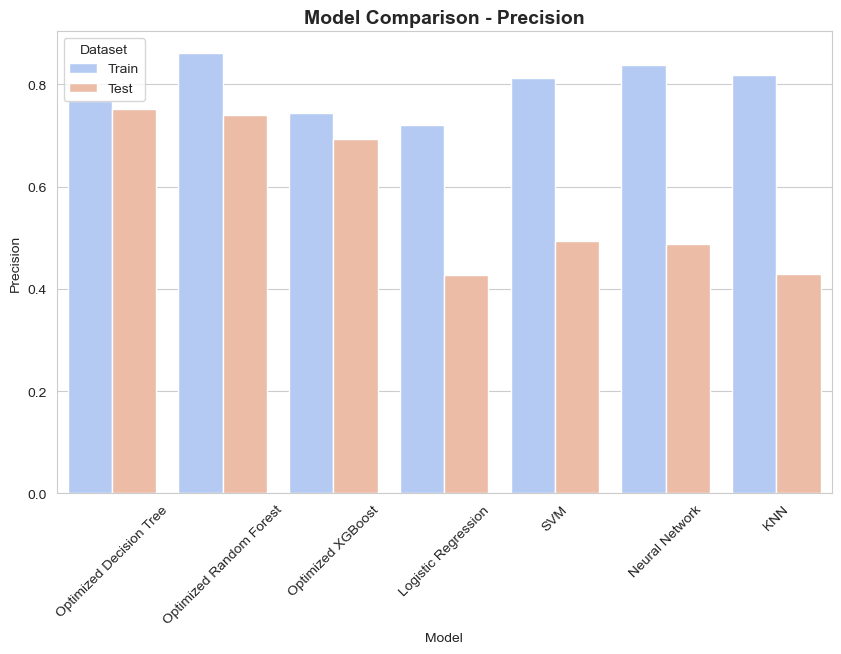

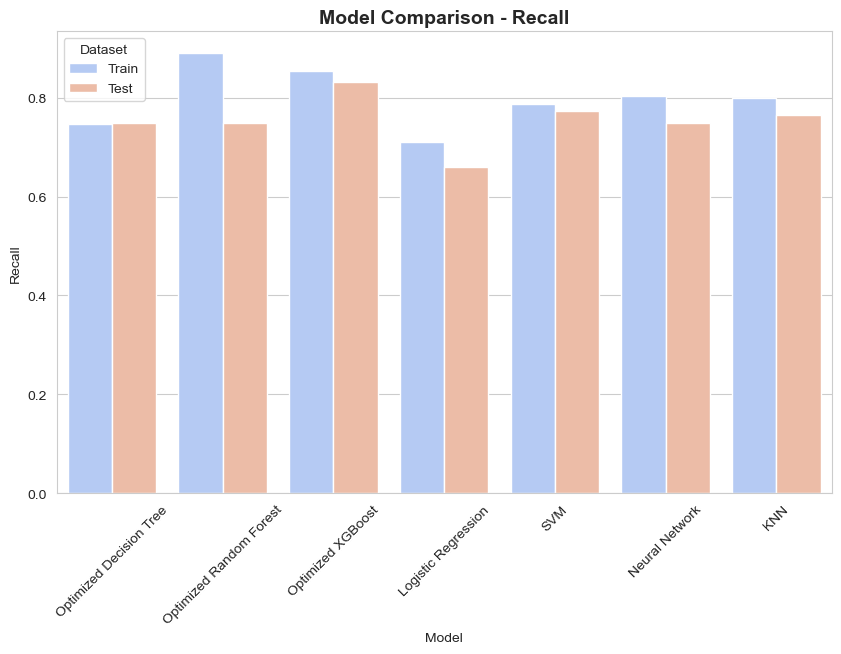

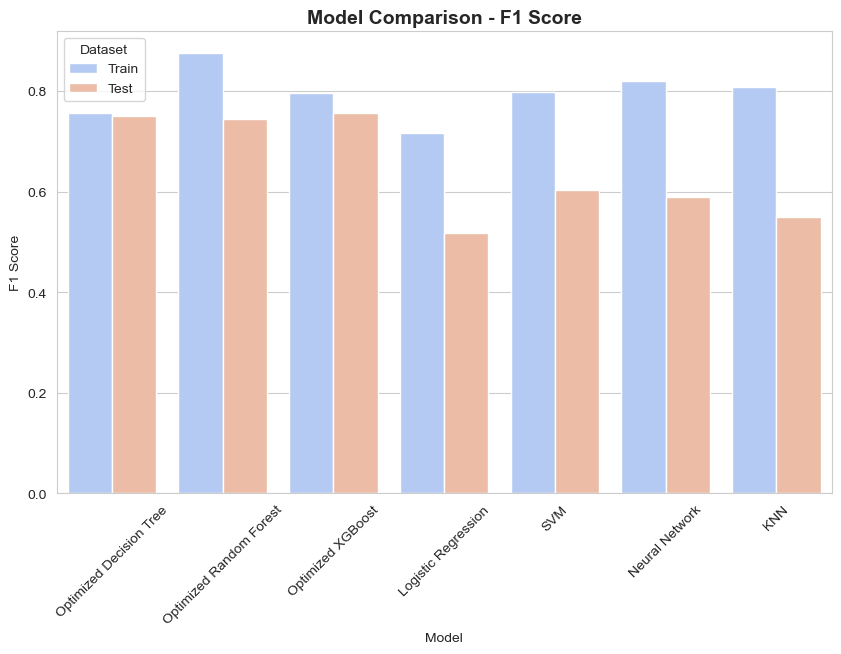

Best Performing Model Based on Test F1 Score:


Dataset                   Test
Model        Optimized XGBoost
Accuracy              0.730989
Precision             0.692098
Recall                0.831424
F1 Score               0.75539
AUC-ROC               0.830809
F2 Score                   NaN
Name: 5, dtype: object

Best Performing Model Based on Test Recall:


Dataset                   Test
Model        Optimized XGBoost
Accuracy              0.730989
Precision             0.692098
Recall                0.831424
F1 Score               0.75539
AUC-ROC               0.830809
F2 Score                   NaN
Name: 5, dtype: object

Best Performing Model Based on Test Precision:


Dataset                         Test
Model        Optimized Decision Tree
Accuracy                    0.751431
Precision                   0.752053
Recall                      0.749591
F1 Score                     0.75082
AUC-ROC                      0.81706
F2 Score                         NaN
Name: 1, dtype: object

Best Performing Model Based on Test Accuracy:


Dataset          Test
Model             SVM
Accuracy     0.792667
Precision    0.494241
Recall       0.772504
F1 Score      0.60281
AUC-ROC           NaN
F2 Score     0.694322
Name: 9, dtype: object

C:\Users\colby\AppData\Local\Temp\ipykernel_27928\706671649.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(test_results.pivot("Model", "Dataset", "Recall"), annot=True, cmap="coolwarm", linewidths=0.5)


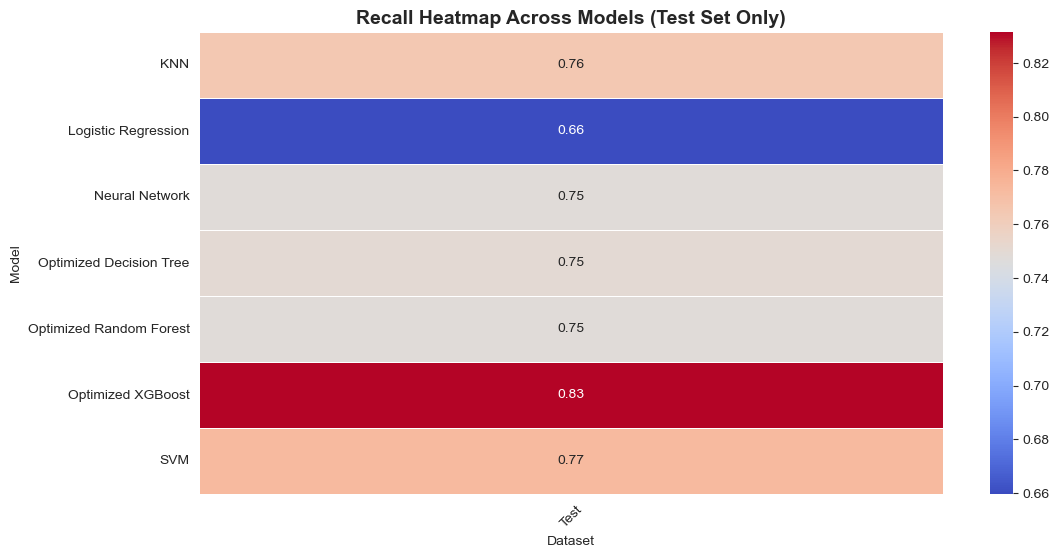

,Model,F1 Score,Recall,Precision,Accuracy,Overall Rank
5,Optimized XGBoost,0.755390,0.831424,0.692098,0.730989,1.0
1,Optimized Decision Tree,0.750820,0.749591,0.752053,0.751431,2.0
3,Optimized Random Forest,0.744300,0.747954,0.740681,0.743254,3.0
9,SVM,0.602810,0.772504,0.494241,0.792667,4.0
11,Neural Network,0.589677,0.747954,0.486688,0.788000,5.0
13,KNN,0.549089,0.764321,0.428440,0.744333,6.0
7,Logistic Regression,0.517995,0.659574,0.426455,0.750000,7.0



Final model comparison results saved to 'final_model_comparison_results.csv'


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Load model results from both CSV files
dt_rf_xg_results = pd.read_csv("model_comparison_results.csv")
logreg_svm_nn_knn_results = pd.read_csv("model_comparison_results_LogReg_SVM_NN_KNN.csv")

# Combine both results into one dataframe
all_results = pd.concat([dt_rf_xg_results, logreg_svm_nn_knn_results], ignore_index=True)

# Display combined results
display(all_results)

# Function to plot model comparison
def plot_model_comparison(metric, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Model", y=metric, hue="Dataset", data=all_results, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(title="Dataset")
    plt.show()

# Plot Accuracy, Precision, Recall, and F1 Score comparison
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    plot_model_comparison(metric, f"Model Comparison - {metric}")

# Filter test scores only
test_results = all_results[all_results["Dataset"] == "Test"]

# Identify the best-performing model based on test set scores
best_modelf1 = test_results.loc[test_results["F1 Score"].idxmax()]
print("Best Performing Model Based on Test F1 Score:")
display(best_modelf1)

best_modelrecall = test_results.loc[test_results["Recall"].idxmax()]
print("Best Performing Model Based on Test Recall:")
display(best_modelrecall)

best_modelprec = test_results.loc[test_results["Precision"].idxmax()]
print("Best Performing Model Based on Test Precision:")
display(best_modelprec)

best_modelacc = test_results.loc[test_results["Accuracy"].idxmax()]
print("Best Performing Model Based on Test Accuracy:")
display(best_modelacc)

# Visualizing Model Performance with Recall Heatmap (Test Scores Only)
plt.figure(figsize=(12, 6))
sns.heatmap(test_results.pivot("Model", "Dataset", "Recall"), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Recall Heatmap Across Models (Test Set Only)", fontsize=14, fontweight='bold')
plt.xlabel("Dataset")
plt.ylabel("Model")
plt.xticks(rotation=45)
plt.show()

# Rank models based on overall performance
ranking_criteria = ["F1 Score", "Recall", "Precision", "Accuracy"]
test_results = test_results.copy()
test_results["Overall Rank"] = test_results[ranking_criteria].mean(axis=1).rank(ascending=False)
test_results = test_results.sort_values(by="Overall Rank")

display(test_results[["Model", "F1 Score", "Recall", "Precision", "Accuracy", "Overall Rank"]])

# Save final comparison results
all_results.to_csv("final_model_comparison_results.csv", index=False)
print("\nFinal model comparison results saved to 'final_model_comparison_results.csv'")